In [49]:
#package installations
! pip install yfinance
! pip install  matplotlib
! pip install sklearn
! pip install keras
! pip install tensorflow

     -------------------------------------- 438.0/438.0 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 59.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 22.9 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 54.4 MB/s eta 0:00:00
     --------------------------------------- 14.2/14.2 MB 59.5 MB/s eta 0:00:00
     ------------------------------------- 904.4/904.4 KB 59.6 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB ? eta 0:00:00
     ---------------------------------------- 42.6/42.6 KB ? eta 0:00:00
     ---------------------------------------- 65.5/65.5 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 5.8/5.8 MB 40.9 MB/s eta 0:00:00
     ---------------------------------------- 126.7/126.7 KB ? eta 0:00:00
     ------------------------------------

In [138]:
#imports
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [112]:
val = input("Enter your ticker: ")#input

Enter your ticker:  TSLA


In [113]:
stock_data = yf.download(tickers=val,period='5y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [114]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-01,62.976002,65.449997,62.962002,64.566002,64.566002,44148000
2017-05-02,64.800003,65.531998,63.312000,63.778000,63.778000,26914000
2017-05-03,63.534000,64.306000,62.090000,62.203999,62.203999,35667000
2017-05-04,61.487999,61.554001,58.152000,59.091999,59.091999,70760000
2017-05-05,59.599998,61.709999,59.360001,61.669998,61.669998,40886500


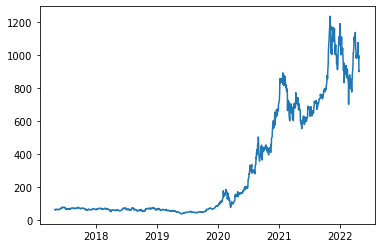

In [115]:
plt.plot(stock_data['Open'])

In [116]:
normalizer = MinMaxScaler(feature_range=(0,1))
stock_data_scaled = normalizer.fit_transform(np.array(stock_data['Open']).reshape(-1,1))

In [117]:
len(stock_data_scaled)

1260

In [118]:
train_size = int(len(stock_data_scaled)*.7)
test_size = int(len(stock_data_scaled)*.3)
test_size

378

In [119]:
train_size

882

In [120]:
stock_data_train, stock_data_test = stock_data_scaled[0:train_size,:], stock_data_scaled[train_size:len(stock_data_scaled),:1]

In [121]:
def function(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [122]:
time_stamp = 100
X_train, y_train = function(stock_data_train,time_stamp)
X_test, y_test = function(stock_data_test,time_stamp)

In [123]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [124]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
13/13 [==============================] - 5s 151ms/step - loss: 0.0040 - val_loss: 0.0735
Epoch 2/100
13/13 [==============================] - 1s 89ms/step - loss: 6.8198e-04 - val_loss: 0.0060
Epoch 3/100
13/13 [==============================] - 1s 88ms/step - loss: 4.0643e-04 - val_loss: 0.0053
Epoch 4/100
13/13 [==============================] - 1s 88ms/step - loss: 2.9652e-04 - val_loss: 0.0053
Epoch 5/100
13/13 [==============================] - 1s 90ms/step - loss: 2.6234e-04 - val_loss: 0.0063
Epoch 6/100
13/13 [==============================] - 1s 88ms/step - loss: 2.6381e-04 - val_loss: 0.0055
Epoch 7/100
13/13 [==============================] - 1s 91ms/step - loss: 2.8042e-04 - val_loss: 0.0081
Epoch 8/100
13/13 [==============================] - 1s 87ms/step - loss: 2.6657e-04 - val_loss: 0.0124
Epoch 9/100
13/13 [==============================] - 1s 87ms/step - loss: 2.3190e-04 - val_loss: 0.0060
Epoch 10/100
13/13 [==============================] - 1s 87ms/step 

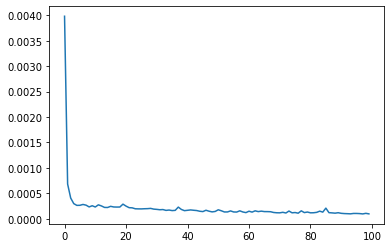

In [126]:
loss = model.history.history['loss']
plt.plot(loss)

In [127]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

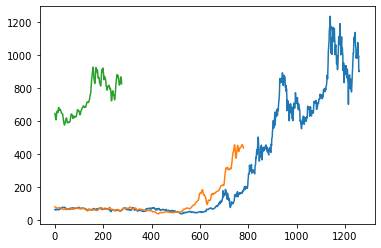

In [128]:
plt.plot(normalizer.inverse_transform(stock_data_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

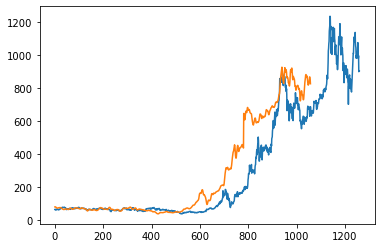

In [129]:
test = np.vstack((train_predict,test_predict))
plt.plot(normalizer.inverse_transform(stock_data_scaled))
plt.plot(test)

In [130]:
#finished training and testing the model and looking here the results are decently accurate so time to try and predict future prices

In [131]:
last_hundred_days = stock_data_test[277:]
last_hundred_days = last_hundred_days.reshape(1,-1)
days = list(last_hundred_days)
days = days[0].tolist()

In [132]:
lst_output=[]
n_steps=100
days_predicted_so_far=0
while(days_predicted_so_far<30):
    
    if(len(days)>100):
        last_hundred_days = np.array(days[1:])
        last_hundred_days=last_hundred_days.reshape(1,-1)
        last_hundred_days = last_hundred_days.reshape((1, n_steps, 1))
        yhat = model.predict(last_hundred_days, verbose=0)
        days.extend(yhat[0].tolist())
        days = days[1:]
        lst_output.extend(yhat.tolist())
        days_predicted_so_far=days_predicted_so_far+1
    else:
        last_hundred_days = last_hundred_days.reshape((1, n_steps,1))
        yhat = model.predict(last_hundred_days, verbose=0)
        days.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        days_predicted_so_far=days_predicted_so_far+1
    

print(lst_output)

[[0.6326507329940796], [0.6124476790428162], [0.591933012008667], [0.5747523903846741], [0.5617610216140747], [0.5527207851409912], [0.5470168590545654], [0.5439368486404419], [0.5427765250205994], [0.5428805947303772], [0.5436629056930542], [0.5446178913116455], [0.5453320741653442], [0.5454905033111572], [0.5448797345161438], [0.5433857440948486], [0.5409854054450989], [0.5377328991889954], [0.5337418913841248], [0.5291673541069031], [0.5241849422454834], [0.5189748406410217], [0.5137069225311279], [0.5085306763648987], [0.5035684704780579], [0.4989125430583954], [0.4946247637271881], [0.49073830246925354], [0.4872616231441498], [0.48418164253234863]]


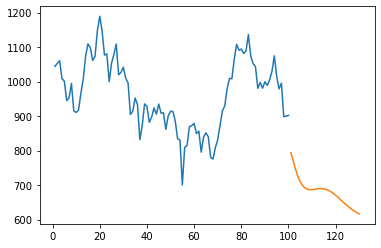

In [133]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)
plt.plot(plot_new, normalizer.inverse_transform(stock_data_scaled[1160:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

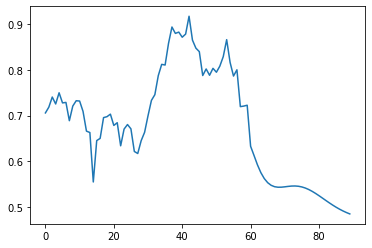

In [134]:
ds_new = stock_data_scaled.tolist()
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

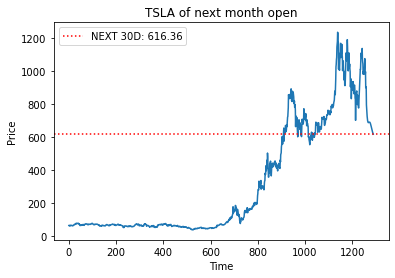

In [137]:
final_graph = normalizer.inverse_transform(ds_new).tolist()
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title(val + " of next month open")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()